# CFP-FP data preparation notebook

The images are stored in a .bin file. They will be extracted and saved into an 
Images folder and a labels.csv file that stores the labels.

In [2]:
import pickle, os, cv2, io, pandas as pd, PIL.Image as Image
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
output_dir = os.path.join('..', 'data', 'datasets', 'face recognition', 'cfp_fp')
os.path.exists(output_dir)

True

In [4]:
output_folder = os.path.join(output_dir, 'Images')
os.makedirs(output_folder, exist_ok = True)

In [6]:
with open(os.path.join(output_dir, 'cfp_fp.bin'), 'rb') as f:
    bins, issame_list = pickle.load(f, encoding = 'bytes')

In [7]:
col1, col2 = [], []
labels = []
for i in range(len(issame_list)):
    image1_bytes = bins[2*i]
    image2_bytes = bins[2*i + 1]

    image1 = cv2.imdecode(np.frombuffer(image1_bytes, np.uint8), cv2.IMREAD_COLOR)
    image2 = cv2.imdecode(np.frombuffer(image2_bytes, np.uint8), cv2.IMREAD_COLOR)

    filename1 = os.path.join(output_folder, f'{2*i}.jpg')
    cv2.imwrite(filename1, image1)

    filename2 = os.path.join(output_folder, f'{2*i + 1}.jpg')
    cv2.imwrite(filename2, image2)

    col1.append(f'{2*i}.jpg')
    col2.append(f'{2*i+1}.jpg')
    labels.append(bool(issame_list[i]))

labels_df = pd.DataFrame(data = {'image1' : col1, 'image2' : col2, 'same' : labels})
labels_df.to_csv(os.path.join(output_dir, 'labels.csv'), index = False)

# EDA

In [8]:
labels_df = pd.read_csv(os.path.join(output_dir, 'labels.csv'))

In [9]:
labels_df.head()

,image1,image2,same
0,0.jpg,1.jpg,True
1,2.jpg,3.jpg,True
2,4.jpg,5.jpg,True
3,6.jpg,7.jpg,True
4,8.jpg,9.jpg,True


In [10]:
labels_df.tail()

,image1,image2,same
6995,13990.jpg,13991.jpg,False
6996,13992.jpg,13993.jpg,False
6997,13994.jpg,13995.jpg,False
6998,13996.jpg,13997.jpg,False
6999,13998.jpg,13999.jpg,False


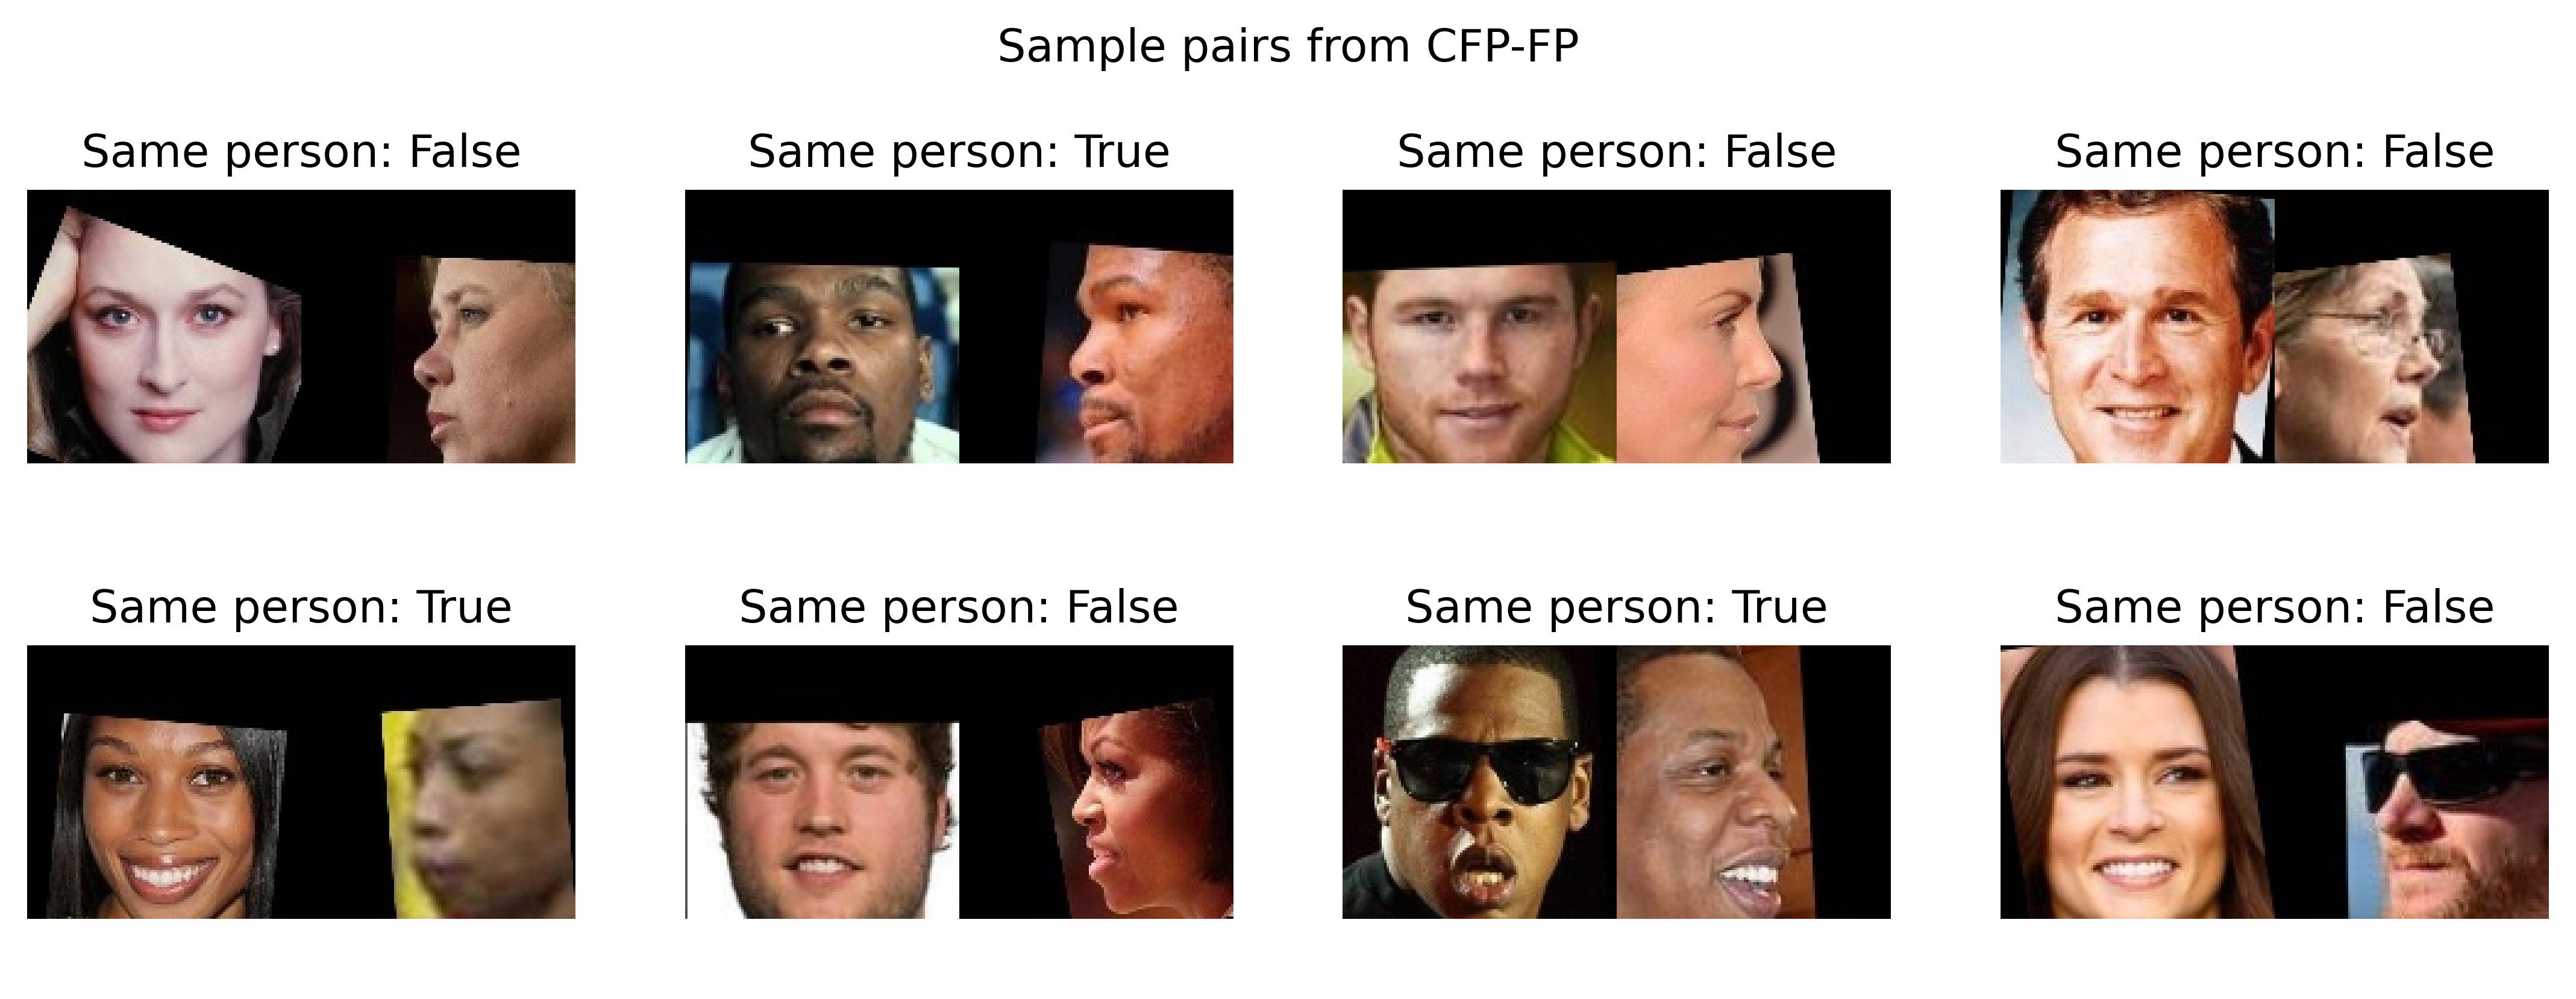

In [11]:
plt.figure(figsize = (12, 4), dpi = 450)
plt.axis('off')
plt.title(f'Sample pairs from CFP-FP', pad = 20)
for i in range(8):
    idx = np.random.randint(low = 0, high = len(labels_df))
    image1 = labels_df.iloc[idx]['image1']
    image2 = labels_df.iloc[idx]['image2']
    label = labels_df.iloc[idx]['same']

    image1 = cv2.imread(os.path.join(output_dir, 'Images', image1))
    image2 = cv2.imread(os.path.join(output_dir, 'Images', image2))
    image = np.hstack((image1, image2))[:, :, ::-1]
    plt.subplot(2, 4, i+1)
    plt.imshow(image)
    plt.title(f'Same person: {label}')
    plt.axis('off')
plt.savefig(
    os.path.join('..', 'data', 'figures', 'Face Recognition', 'CFP-FP', 'Sample images from CFP-FP')
)
plt.show()
